# Assignment 4

Problem Statement : Supervised Learning Prediction for Binary Classification

Dataset : Play Tennis Dataset

ML Model : Decision Trees

Performance of the model : 0.8 (f1_score)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("Basic_Decision_Tree.csv")
data

,Weather,Temperature,Humidity,Wind,Result
0,Sunny,Hot,High,Weak,No
1,Cloudy,Hot,High,Weak,Yes
2,Sunny,Mild,Normal,Strong,Yes
3,Cloudy,Mild,High,Strong,Yes
4,Rainy,Hot,Low,Strong,No
5,Rainy,Cool,Normal,Strong,No
6,Rainy,Mild,High,Weak,Yes
7,Sunny,Hot,High,Strong,No
8,Cloudy,Hot,Normal,Weak,Yes
9,Rainy,Mild,High,Strong,No


In [ ]:
x_data = data[data.columns[data.columns != 'Result']]
y_data = data['Result']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size =0.4, random_state = 42)

In [ ]:
x_train

,Weather,Temperature,Humidity,Wind
7,Sunny,Hot,High,Strong
2,Sunny,Mild,Normal,Strong
9,Rainy,Mild,High,Strong
4,Rainy,Hot,Low,Strong
3,Cloudy,Mild,High,Strong
6,Rainy,Mild,High,Weak


In [ ]:
from sklearn.preprocessing import LabelEncoder
le_weather = LabelEncoder()
le_temp = LabelEncoder()
le_humidity = LabelEncoder()
le_wind = LabelEncoder()

In [ ]:
x_train['Weather_encoded'] = le_weather.fit_transform(x_train['Weather'])
x_train['Temperature_encoded'] = le_temp.fit_transform(x_train['Temperature'])
x_train['Humidity_encoded'] = le_humidity.fit_transform(x_train['Humidity'])
x_train['Wind_encoded'] = le_wind.fit_transform(x_train['Wind'])
x_train

,Weather,Temperature,Humidity,Wind,Weather_encoded,Temperature_encoded,Humidity_encoded,Wind_encoded
7,Sunny,Hot,High,Strong,2,0,0,0
2,Sunny,Mild,Normal,Strong,2,1,2,0
9,Rainy,Mild,High,Strong,1,1,0,0
4,Rainy,Hot,Low,Strong,1,0,1,0
3,Cloudy,Mild,High,Strong,0,1,0,0
6,Rainy,Mild,High,Weak,1,1,0,1


In [ ]:
x_test['Weather_encoded'] = le_weather.fit_transform(x_test['Weather'])
x_test['Temperature_encoded'] = le_temp.fit_transform(x_test['Temperature'])
x_test['Humidity_encoded'] = le_humidity.fit_transform(x_test['Humidity'])
x_test['Wind_encoded'] = le_wind.fit_transform(x_test['Wind'])
x_test

,Weather,Temperature,Humidity,Wind,Weather_encoded,Temperature_encoded,Humidity_encoded,Wind_encoded
8,Cloudy,Hot,Normal,Weak,0,1,1,1
1,Cloudy,Hot,High,Weak,0,1,0,1
5,Rainy,Cool,Normal,Strong,1,0,1,0
0,Sunny,Hot,High,Weak,2,1,0,1


In [ ]:
le_result = LabelEncoder()
y_train = le_result.fit_transform(y_train)
y_train

array([0, 1, 0, 0, 1, 1])

In [ ]:
X_train = x_train[['Weather_encoded', 'Temperature_encoded', 'Humidity_encoded', 'Wind_encoded']]
X_test = x_test[['Weather_encoded', 'Temperature_encoded', 'Humidity_encoded', 'Wind_encoded']]
X_test

,Weather_encoded,Temperature_encoded,Humidity_encoded,Wind_encoded
8,0,1,1,1
1,0,1,0,1
5,1,0,1,0
0,2,1,0,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier( random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import f1_score
y_pred = model.predict(X_test)
y_pred_yn = le_result.inverse_transform(y_pred)
y_test_encoded = le_result.fit_transform(y_test)
model.score(X_train, y_train)

1.0

In [ ]:
print("f1_score : ", f1_score(y_test, y_pred_yn, pos_label = 'Yes'))
model.score(X_test, y_test_encoded)

f1_score :  0.8


0.75

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(model, out_file=None, 
                           feature_names = X_train.columns,
                           filled = True, rounded = True,
                           special_characters = True,)

graph1 = graphviz.Source(dot_data)

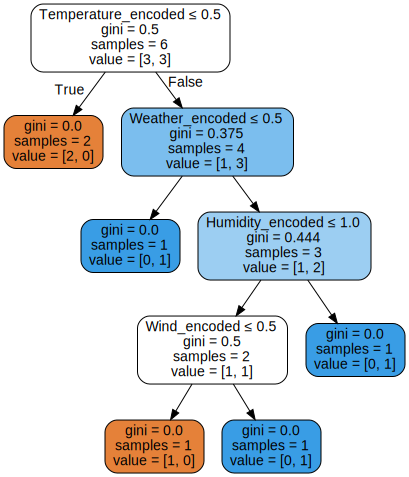

In [ ]:
graph1

In [ ]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf' : [1, 2, 4, 6, 8],
    'criterion' : ["gini", "entropy"] 
}


In [ ]:
grid_search = GridSearchCV(estimator = model, param_grid=params, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 4, 6, 8]},
             scoring='accuracy', verbose=1)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005252,0.001038,0.003100,0.000233,gini,1,1,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.5,0.5,0.5,0.5,0.0,1
1,0.005891,0.002549,0.005143,0.003202,gini,1,2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.5,0.5,0.5,0.5,0.0,1
2,0.007055,0.003871,0.004434,0.002321,gini,1,4,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.5,0.5,0.5,0.5,0.0,1
3,0.004490,0.000254,0.003193,0.000201,gini,1,6,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.5,0.5,0.5,0.5,0.0,1
4,0.004273,0.000233,0.004212,0.001853,gini,1,8,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.5,0.5,0.5,0.5,0.0,1


In [ ]:
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Best: 0.500000 using {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1}


In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=1, random_state=42)

In [ ]:
model_new  = DecisionTreeClassifier(max_depth=1, min_samples_leaf=2, random_state = 42)
model_new.fit(X_train, y_train)
y_pred = model_new.predict(X_test)
y_pred_yn = le_result.inverse_transform(y_pred)
y_test_encoded = le_result.fit_transform(y_test)
print("f1_score : ", f1_score(y_test, y_pred_yn, pos_label = 'Yes'))
model_new.score(X_test, y_test_encoded)

f1_score :  0.8


0.75